# Covid19 India Data Analysis

In this Jupyter notebook we will discuss on covid-19 cases in India, in various states of India , and analyse the effect of covid-19 in India.

This datasheet is a csv file which is downloaded from Kaggle [COVID-19 in India](https://www.kaggle.com/datasets/sudalairajkumar/covid19-in-india).

So here I'll be extracting some information from this datasheet which would be benificial in providing the information about covid-19 in india, And the tools which I will be using are pandas, matplotlib, and seaborn to manage the datasheet and plot graphs out of it to visualize the data.

And all the tools mentioned above I have learned from --> [the course](http://zerotopandas.com).

## Downloading the Dataset

*Lets download the COVID-19 in India dataset from Kaggle.*


In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/sudalairajkumar/covid19-in-india' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rohan0306
Your Kaggle Key: ········


100%|██████████| 758k/758k [00:00<00:00, 77.5MB/s]

The dataset has been downloaded and extracted.

In [9]:
data_dir = './covid19-in-india'

In [10]:
import os
os.listdir(data_dir)

['covid_19_india.csv',
 'covid_vaccine_statewise.csv',
 'StatewiseTestingDetails.csv']

Let us save and upload our work to Jovian before continuing.

In [11]:
project_name = "Covid19 India Data Analysis" 

In [12]:
!pip install jovian --upgrade -q

In [13]:
import jovian

In [14]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "rohanj0306/Covid19 India Data Analysis"
[jovian] Committed successfully! https://jovian.ai/rohanj0306/covid19-india-data-analysis


'https://jovian.ai/rohanj0306/covid19-india-data-analysis'

## Data Preparation and Cleaning

*In this step we will be preparing the data sheet in most usable form by filtering and cleaning the data.* 



In [15]:
import pandas as pd

In [16]:
covid_df = pd.read_csv(data_dir + '/covid_19_india.csv')

In [17]:
covid_df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


 ### There are total 18110 rows and 9 columns in this data sheet


In [18]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [19]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [20]:
covid_df.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

###  Lets extract vaccination dataset statewise.

In [21]:
vaccine_df=pd.read_csv("./covid19-in-india/covid_vaccine_statewise.csv")

In [22]:
vaccine_df.head(7)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0


In [23]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [24]:
covid_df.head(7)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3


In [25]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format='%Y-%m-%d')

In [26]:
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [27]:
covid_df['Active_Cases']=covid_df['Confirmed']-(covid_df['Cured']-covid_df['Deaths'])
covid_df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_Cases
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353,15774
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660,3622
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462,15180
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812,46095
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999,46719


In [28]:
statewise = pd.pivot_table(covid_df, values=['Confirmed','Deaths','Cured'],index= 'State/UnionTerritory' , aggfunc = max)

In [29]:
statewise['Recovery Rate'] = statewise ['Cured']*100/ statewise['Confirmed']

In [30]:
statewise['Mortality Rate'] = statewise ['Deaths']*100/ statewise['Confirmed']

In [31]:
statewise = statewise.sort_values( by = 'Confirmed', ascending = False)

In [32]:
statewise.style.background_gradient(cmap="cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


### Top 10 Active cases statewise.

In [33]:
Top_10_active_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['Active_Cases','Date']].sort_values(by ='Active_Cases', ascending= False).reset_index()

In [34]:
Top_10_active_cases.head()

,State/UnionTerritory,Active_Cases,Date
0,Maharashtra,829727,2021-08-11
1,Karnataka,648383,2021-08-11
2,Kerala,458370,2021-08-11
3,Maharashtra***,359438,2021-07-21
4,Tamil Nadu,357936,2021-08-11


In [35]:
import jovian

In [36]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rohanj0306/covid19-india-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/rohanj0306/covid19-india-data-analysis


'https://jovian.ai/rohanj0306/covid19-india-data-analysis'

## Exploratory Analysis and Visualization

 *Here we will be analysing the cleaned data and will plot some graphs for visualization.*



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [55]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Lets determine Top 10 states with most active cases in India.

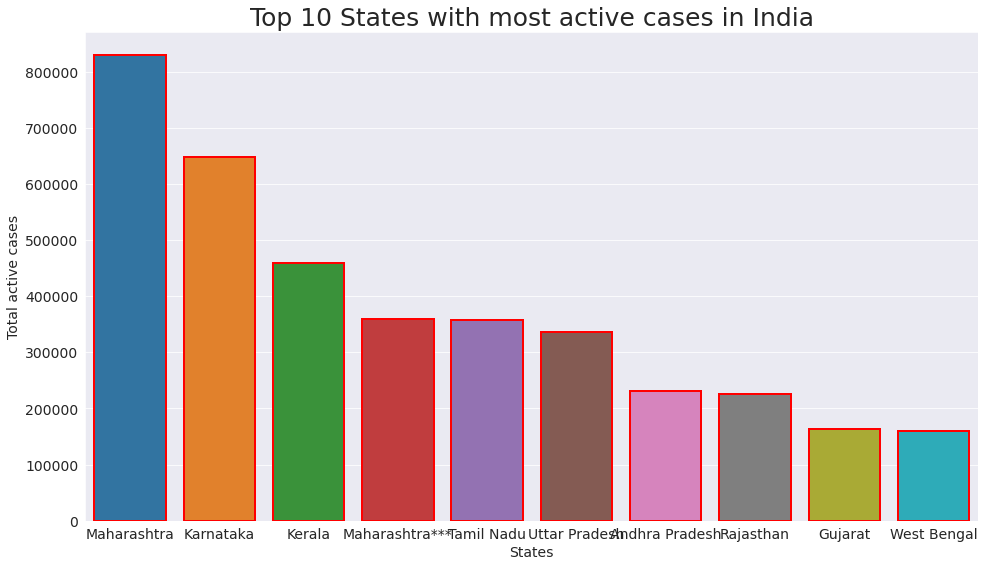

In [38]:
Top_10_active_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['Active_Cases','Date']].sort_values(by ='Active_Cases', ascending= False).reset_index()
fig = plt.figure(figsize=(16,9))
plt.title("Top 10 States with most active cases in India",size =25)
ax= sns.barplot(data = Top_10_active_cases.iloc[:10],y = 'Active_Cases',x='State/UnionTerritory', linewidth=2, edgecolor='red')

plt.xlabel("States")
plt.ylabel("Total active cases")
plt.show()

### From the above plot it can be seen that Maharashtra has the highest number of active cases in india.

### Now lets determine the top states with highest deaths.

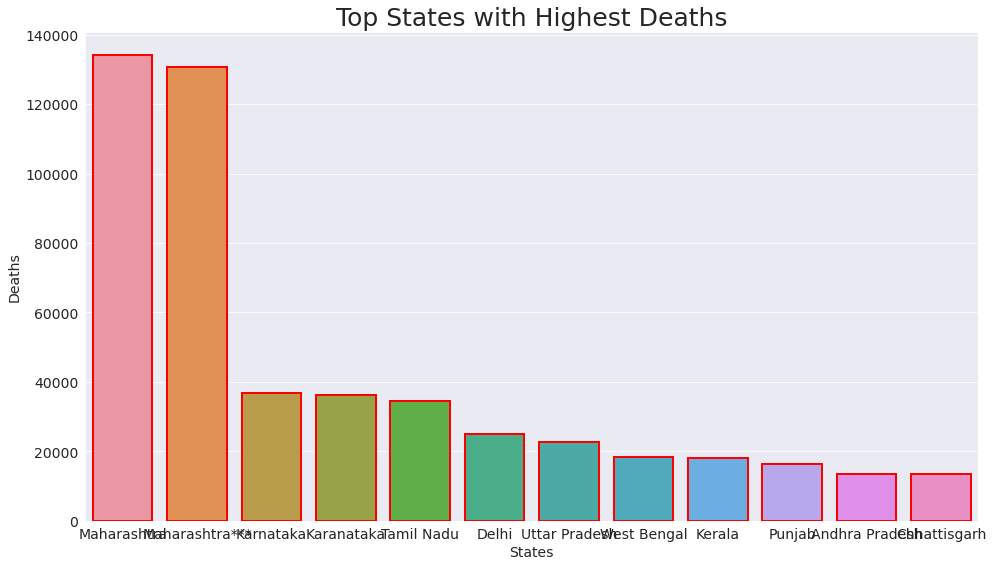

In [39]:
Top_10_highest_deaths= covid_df.groupby(by = 'State/UnionTerritory').max()[['Deaths','Date']].sort_values(by ='Deaths', ascending = False).reset_index()
fig = plt.figure(figsize=(16,9))
plt.title("Top States with Highest Deaths", size=25)
ax= sns.barplot(data = Top_10_highest_deaths.iloc[:12], x='State/UnionTerritory',y='Deaths',linewidth=2, edgecolor='red')
plt.xlabel('States')
plt.ylabel('Deaths')
plt.show()

In [40]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [41]:
vaccine_df.rename(columns={'Updated On':'Vaccine_date'},inplace=True)

In [42]:
vaccine_df.head(10)

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


In [43]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [44]:
vaccine_df.isnull().sum()

Vaccine_date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [45]:
vaccination = vaccine_df.drop(columns=['Sputnik V (Doses Administered)', 'AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'], axis=1)

In [46]:
vaccination.head()

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [56]:
vaccine = vaccine_df[vaccine_df.State!='India']
vaccine

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Covid Testing data analysis.

In [62]:
covid_testing = pd.read_csv("./covid19-in-india/StatewiseTestingDetails.csv")
covid_testing['Date'] = covid_testing['Date'].astype('datetime64[ns]')
covid_testing.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [63]:
covid_testing.shape

(16336, 5)

In [64]:
covid_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16336 entries, 0 to 16335
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          16336 non-null  datetime64[ns]
 1   State         16336 non-null  object        
 2   TotalSamples  16336 non-null  float64       
 3   Negative      6969 non-null   object        
 4   Positive      5662 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 638.2+ KB


In [65]:
covid_testing['Negative'] = covid_testing['TotalSamples'] - covid_testing['Positive']
covid_testing = covid_testing.dropna()
covid_testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5662 entries, 0 to 15982
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5662 non-null   datetime64[ns]
 1   State         5662 non-null   object        
 2   TotalSamples  5662 non-null   float64       
 3   Negative      5662 non-null   float64       
 4   Positive      5662 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 265.4+ KB


In [66]:
covid_testing_state = covid_testing.groupby('State')['TotalSamples','Negative','Positive'].max().reset_index()
covid_testing_state["Positive_percentage"] = ((covid_testing["Positive"] / covid_testing["TotalSamples"]) * 100)
covid_testing_state.style.background_gradient(cmap='gist_earth_r')

/tmp/ipykernel_38/2487236013.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_testing_state = covid_testing.groupby('State')['TotalSamples','Negative','Positive'].max().reset_index()


,State,TotalSamples,Negative,Positive,Positive_percentage
0,Andaman and Nicobar Islands,427711.000000,420195.000000,7516.000000,0.855310
1,Andhra Pradesh,2534304.000000,2298779.000000,235525.000000,1.007839
2,Arunachal Pradesh,122854.000000,120196.000000,2658.000000,1.158708
3,Assam,1930764.000000,1842856.000000,87908.000000,0.879062
4,Bihar,1272980.000000,1182427.000000,90553.000000,0.494234
5,Chandigarh,22198.000000,19893.000000,2305.000000,0.473798
6,Chhattisgarh,468099.000000,448640.000000,19459.000000,0.465970
7,Dadra and Nagar Haveli and Daman and Diu,72410.000000,69216.000000,3194.000000,0.460444
8,Delhi,1291411.000000,1139483.000000,151928.000000,0.454358
9,Goa,178175.000000,176827.000000,12333.000000,0.450389


## Inferences ans Conclusions

#### On the basis of the analysis of the covid-19 in India dataset we can come to the following conclusions : 

- We can see that, the number of COVID-19 cases remained fairly high for the North-Eastern states even in the months of June and July when the cases saw a huge decrease in the whole country.
- In India there were primarily two waves of COVID-19 that affected it the most. The first wave that peaked in September of 2020, and then second wave that peaked in the May of 2021. The second wave was much more deadly than the first wave for a multitude of reasons.
- From the graphs above it's evident that different regions of India were affected differently. Maharashtra saw the most number of COVID-19 cases during the two years mostly because of the hgih population of the state.

In [68]:
import jovian

In [69]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rohanj0306/covid19-india-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/rohanj0306/covid19-india-data-analysis


'https://jovian.ai/rohanj0306/covid19-india-data-analysis'

## References and Future Work

This dataset has a lot of information about covid-19 cases in India which can be further Utilized to gain useful insights.

I would like to thank Jovian.ml for such an helpful course .


References:

- Kaggle Datasets : https://www.kaggle.com/datasets/sudalairajkumar/covid19-in-india/code
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

In [70]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>